# Good Old-Fashion AI

# 0. Libraries

In [13]:
import random
import matplotlib.pyplot as plt

# 1. Sistema Experto basados en reglas

In [14]:
class ExpertSystem:
    """
    Representa un sistema experto basado en reglas para realizar diagnósticos
    o inferencias a partir de un conjunto de síntomas/hechos de entrada.
    """

    def __init__(self):
        """
        Inicializa una nueva instancia de ExpertSystem con un conjunto
        de reglas vacío.
        """
        self.rules = []

    def add_rule(self, condition, diagnosis):
        """
        Añade una nueva regla al sistema experto.

        Una regla consiste en una condición (conjunto de síntomas requeridos con sus valores)
        y una conclusión/diagnóstico (el resultado si la condición se cumple).
        """
        # Se podría añadir validación de tipos aquí en un entorno de producción.
        self.rules.append({"condition": condition, "diagnosis": diagnosis})

    def diagnose(self, symptoms):
        """
        Evalúa el conjunto de síntomas de entrada contra todas las reglas del sistema
        y devuelve una lista de posibles diagnósticos o conclusiones.

        Una regla se cumple solo si *todos* los pares clave-valor en su condición
        coinciden con los pares clave-valor proporcionados en el diccionario de síntomas
        de entrada.
        """
        possible_diagnoses = []

        # Itera sobre cada regla para comprobar si su condición se cumple
        for rule in self.rules:
            # La condición 'all(...)' comprueba que CADA par (symptom, value) en
            # la condición de la regla (rule["condition"]) esté presente en el
            # diccionario de síntomas de entrada (symptoms) Y tenga el mismo valor.
            condition_met = all(
                symptoms.get(symptom) == value for symptom, value in rule["condition"].items()
                )

            if condition_met:
                # Si la condición de la regla se cumple, añade el diagnóstico
                possible_diagnoses.append(rule["diagnosis"])

        return possible_diagnoses


# 2. Example: Expert System for Medical Diagnosis

In [25]:
medical_expert = ExpertSystem()

Ahora añadimos las reglas de "conocimiento experto" para hacer una predicción de diagnostico:

In [27]:
medical_expert.rules

[]

In [28]:
# Define rules for medical conditions
medical_expert.add_rule({"fiebre": True, "tos": True}, "gripa")
medical_expert.add_rule({"dolor_de_cabeza": True, "nausea": True}, "migraña")
medical_expert.add_rule({"salpullido": True, "comezon": True}, "reacción alergia")

In [29]:
medical_expert.rules

[{'condition': {'fiebre': True, 'tos': True}, 'diagnosis': 'gripa'},
 {'condition': {'dolor_de_cabeza': True, 'nausea': True},
  'diagnosis': 'migraña'},
 {'condition': {'salpullido': True, 'comezon': True},
  'diagnosis': 'reacción alergia'}]

Probamos nuestros "sistema experto":

In [32]:
# Test the expert system with patient symptoms
cesar_symptoms = {
    "fiebre": False,
    "tos": False,
    "dolor_de_cabeza": True,
    "nausea": True,
    "salpullido": False,
    "comezon": False
    }

diagnoses = medical_expert.diagnose(cesar_symptoms)

In [33]:
# Print the diagnosis results
if diagnoses:
    print(f"Possible Diagnoses for the Patient: {', '.join(diagnoses)}")
else:
    print("No specific diagnosis found based on the symptoms.")

Possible Diagnoses for the Patient: migraña


## Otra prueba

In [34]:
def simulate_expert_system(expert_system: ExpertSystem, num_tests: int) -> dict:
    """
    Funncion para simular datos de paciente num_test paciente
    """
    results = {"gripa": 0, "migraña": 0, "reacción alergia": 0, "Unknown": 0}

    for _ in range(num_tests):
        # Generate random symptoms for testing
        random_symptoms = {
            "fiebre": random.choice([True, False]),
            "tos": random.choice([True, False]),
            "dolor_de_cabeza": random.choice([True, False]),
            "nausea": random.choice([True, False]),
            "salpullido": random.choice([True, False]),
            "comezon": random.choice([True, False]),
        }

        # Diagnose the patient using the expert system
        possible_diagnoses = expert_system.diagnose(random_symptoms)

        # Update the results with a default label for an empty list
        results[possible_diagnoses[0] if possible_diagnoses else "Unknown"] += 1

    return results

In [40]:
# Run the simulation
num_tests = 1000000

simulation_results = simulate_expert_system(medical_expert, num_tests)

In [41]:
simulation_results

{'gripa': 250260,
 'migraña': 187419,
 'reacción alergia': 140955,
 'Unknown': 421366}

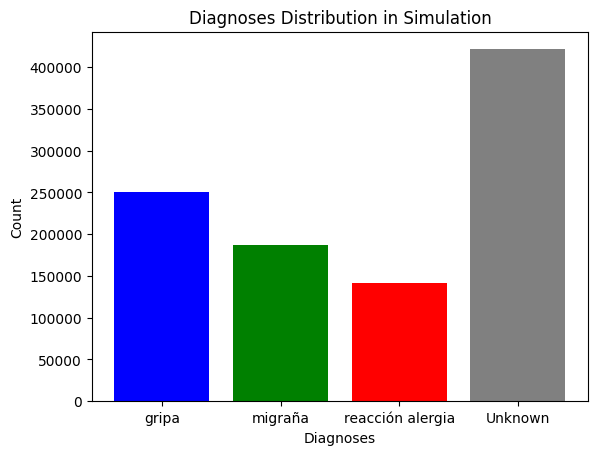

In [42]:
# Visualize the results
labels = list(simulation_results.keys())
counts = list(simulation_results.values())

plt.bar(labels, counts, color=['blue', 'green', 'red', 'gray'])
plt.title("Diagnoses Distribution in Simulation")
plt.xlabel("Diagnoses")
plt.ylabel("Count")
plt.show()